In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import scipy.stats as stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('/content/table to xlsx.xlsx - Table 1.csv', skiprows=1)
df

In [ ]:
# vector data generation
buildings_energy = df.iloc[1:9, 1:].applymap(lambda x: int(x.replace(',', ''))).sum()
transportation = df.iloc[10:20, 1:].applymap(lambda x: int(x.replace(',', ''))).sum()
water_waste = df.iloc[21:27, 1:].applymap(lambda x: int(x.replace(',', ''))).sum()
agriculture = df.iloc[28:40, 1:].applymap(lambda x: int(x.replace(',', ''))).sum()

In [ ]:
clean_df = pd.DataFrame(
    {
        'buildings_energy': buildings_energy,
        'transportation': transportation,
        'water_waste': water_waste,
        'agriculture': agriculture
    },
)
clean_df.index = pd.to_datetime(clean_df.index, infer_datetime_format=True, format='%Y')
clean_df.sort_index(ascending=False, inplace=True)
clean_df.to_excel('/content/clean_data.xlsx')

In [ ]:
clean_df

,buildings_energy,transportation,water_waste,agriculture
2020-01-01,1592811,1042149,90176,70043
2019-01-01,2036584,1139261,82458,70043
2018-01-01,1814217,1135681,81070,69775
2017-01-01,1883920,1126903,79601,69844
2016-01-01,1732000,1142356,76214,68176
2015-01-01,1647461,1142883,71412,68130
2014-01-01,1597841,1139573,68167,64859
2013-01-01,1651284,1117615,65921,63318
2012-01-01,1517928,1092418,66729,61344
2011-01-01,1547270,1128432,65622,61215


In [ ]:
pd.DataFrame([clean_df.buildings_energy, clean_df.buildings_energy.shift(-1), clean_df.buildings_energy.shift(-2), clean_df.buildings_energy.shift(-3)]).T

,buildings_energy,buildings_energy,buildings_energy,buildings_energy
2020-01-01,1592811.0,2036584.0,1814217.0,1883920.0
2019-01-01,2036584.0,1814217.0,1883920.0,1732000.0
2018-01-01,1814217.0,1883920.0,1732000.0,1647461.0
2017-01-01,1883920.0,1732000.0,1647461.0,1597841.0
2016-01-01,1732000.0,1647461.0,1597841.0,1651284.0
2015-01-01,1647461.0,1597841.0,1651284.0,1517928.0
2014-01-01,1597841.0,1651284.0,1517928.0,1547270.0
2013-01-01,1651284.0,1517928.0,1547270.0,1718300.0
2012-01-01,1517928.0,1547270.0,1718300.0,NaN
2011-01-01,1547270.0,1718300.0,NaN,NaN


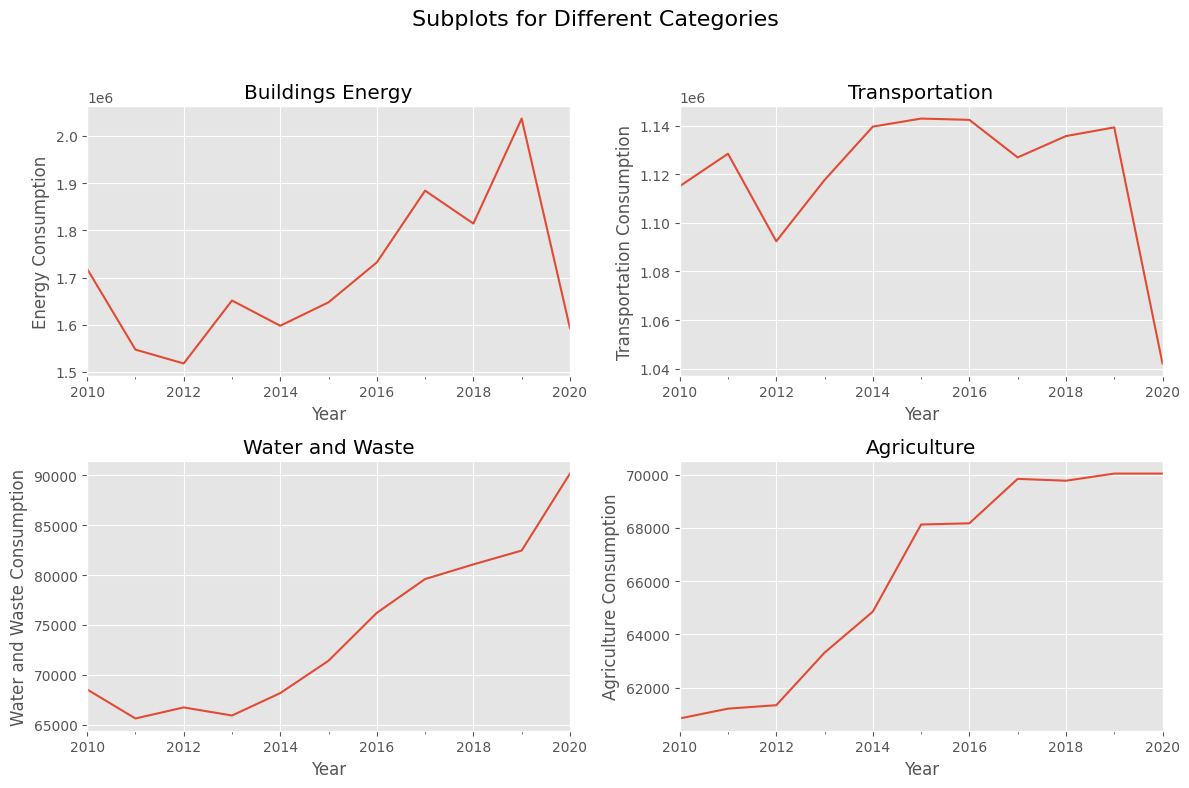

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Subplots for Different Categories', fontsize=16)

# Plot 'buildings_energy'
clean_df['buildings_energy'].plot(ax=axes[0, 0], title='Buildings Energy')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Energy Consumption')

# Plot 'transportation'
clean_df['transportation'].plot(ax=axes[0, 1], title='Transportation')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Transportation Consumption')

# Plot 'water_waste'
clean_df['water_waste'].plot(ax=axes[1, 0], title='Water and Waste')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Water and Waste Consumption')

# Plot 'agriculture'
clean_df['agriculture'].plot(ax=axes[1, 1], title='Agriculture')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Agriculture Consumption')

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

In [ ]:
clean_df.sort_index(ascending=True, inplace=True)
clean_df

,buildings_energy,transportation,water_waste,agriculture
2010-01-01,1718300,1115074,68531,60846
2011-01-01,1547270,1128432,65622,61215
2012-01-01,1517928,1092418,66729,61344
2013-01-01,1651284,1117615,65921,63318
2014-01-01,1597841,1139573,68167,64859
2015-01-01,1647461,1142883,71412,68130
2016-01-01,1732000,1142356,76214,68176
2017-01-01,1883920,1126903,79601,69844
2018-01-01,1814217,1135681,81070,69775
2019-01-01,2036584,1139261,82458,70043


#ARIMA

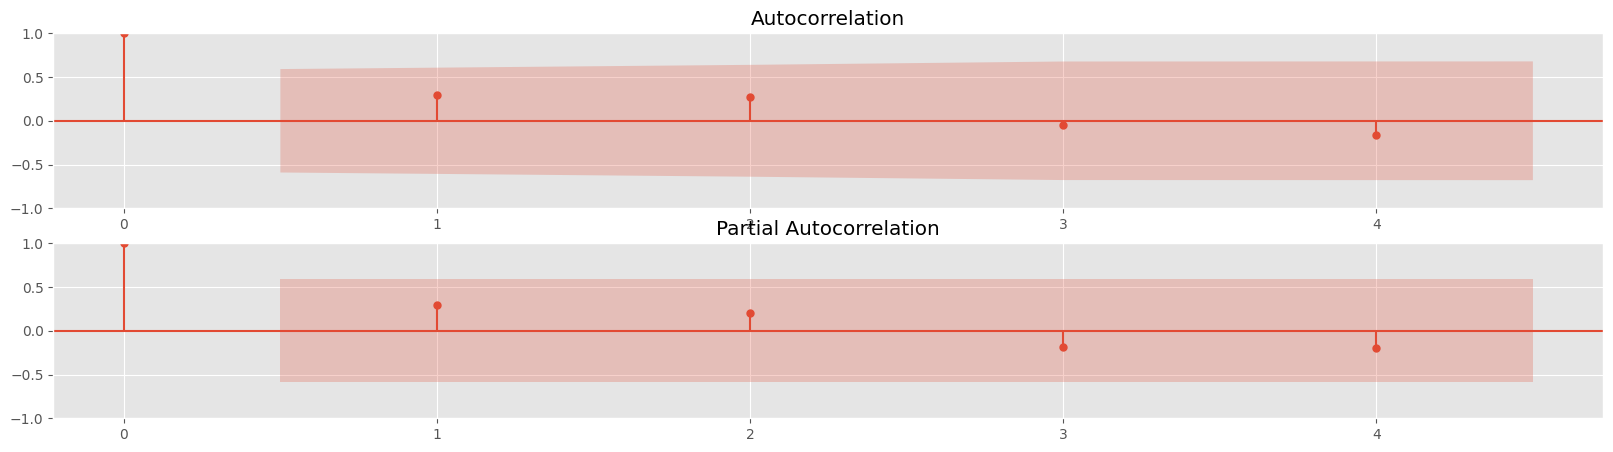

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5))
plot_acf(clean_df.buildings_energy, lags=4, ax=ax1)
plot_pacf(clean_df.buildings_energy, lags=4, ax=ax2)
plt.show()

In [ ]:
# Model
arima_model = SARIMAX(clean_df.buildings_energy, order=(1, 0, 1))
arima_result = arima_model.fit()

# Forecasting
arima_forecast = arima_result.forecast(steps=10)
arima_forecast_buildings_energy = arima_result.forecast(steps=10)
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       buildings_energy   No. Observations:                   11
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -150.168
Date:                Mon, 09 Oct 2023   AIC                            306.337
Time:                        21:38:43   BIC                            307.531
Sample:                    01-01-2010   HQIC                           305.584
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.020     48.805      0.000       0.959       1.039
ma.L1         -0.5525      0.384     -1.439      0.150      -1.305       0.200
sigma2      3.476e+10    2.7e-12   1.29e+22      0.000    3.48e+10    3.48e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.37   Prob(JB):                         0.67
Heteroskedasticity (H):               2.93   Skew:                            -0.64
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.84e+38. Standard errors may be unstable.
"""

In [ ]:
# Calculate a confidence interval for the predictions (e.g., 95% confidence interval)
confidence_interval = 1.96 * np.std(arima_result.resid)  # Assuming a 95% confidence interval

# Plot the upper and lower bounds of the confidence interval
upper_bound = arima_forecast + confidence_interval
lower_bound = arima_forecast - confidence_interval

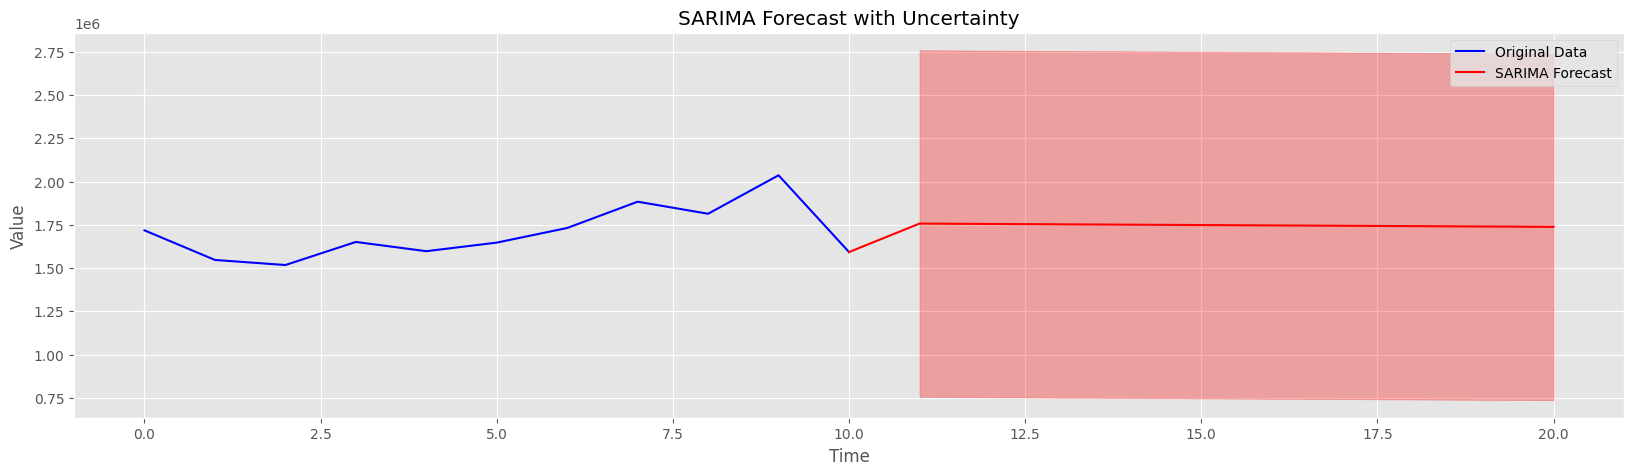

In [ ]:
# Concatenate the original data and the forecasted values
combined_data = np.concatenate([clean_df.buildings_energy.values, arima_forecast])

# Create a time index for the combined data
time_index = np.arange(len(combined_data))

# Plot the combined data (original + forecasted)
plt.subplots(figsize=(20, 5))
plt.plot(time_index[:len(clean_df)], combined_data[:len(clean_df)], label='Original Data', color='blue')
plt.plot(time_index[len(clean_df)-1:], combined_data[len(clean_df)-1:], label='SARIMA Forecast', color='red')

# Plot the uncertainty for the forecasting part
plt.fill_between(time_index[len(clean_df):], lower_bound, upper_bound, alpha=0.3, color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast with Uncertainty')
plt.show()

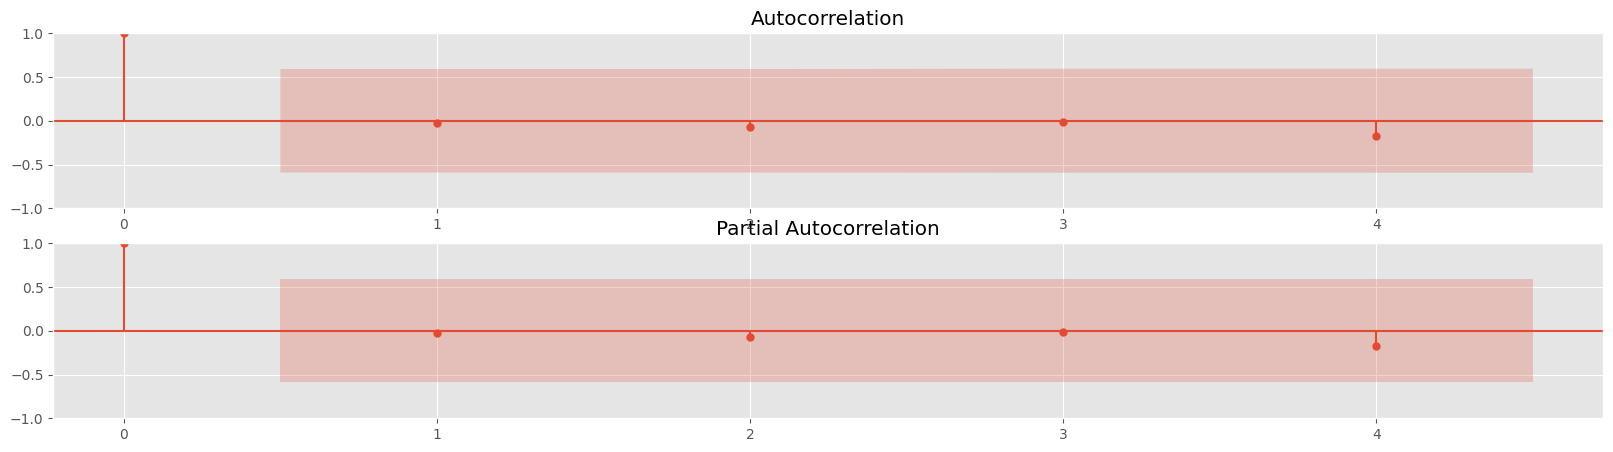

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5))
plot_acf(clean_df.transportation, lags=4, ax=ax1)
plot_pacf(clean_df.transportation, lags=4, ax=ax2)
plt.show()

In [ ]:
# Model
arima_model = SARIMAX(clean_df.transportation, order=(1, 0, 1))
arima_result = arima_model.fit()

# Forecasting
arima_forecast = arima_result.forecast(steps=10)
arima_forecast_transportation = arima_result.forecast(steps=10)
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         transportation   No. Observations:                   11
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -134.013
Date:                Mon, 09 Oct 2023   AIC                            274.026
Time:                        21:38:44   BIC                            275.220
Sample:                    01-01-2010   HQIC                           273.274
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.008    121.203      0.000       0.984       1.016
ma.L1         -0.4431      2.087     -0.212      0.832      -4.534       3.647
sigma2        1.4e+09   8.21e-10   1.71e+18      0.000     1.4e+09     1.4e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.65
Prob(Q):                              0.99   Prob(JB):                         0.02
Heteroskedasticity (H):               3.43   Skew:                            -1.69
Prob(H) (two-sided):                  0.26   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+35. Standard errors may be unstable.
"""

In [ ]:
# Calculate a confidence interval for the predictions (e.g., 95% confidence interval)
confidence_interval = 1.96 * np.std(arima_result.resid)  # Assuming a 95% confidence interval

# Plot the upper and lower bounds of the confidence interval
upper_bound = arima_forecast + confidence_interval
lower_bound = arima_forecast - confidence_interval

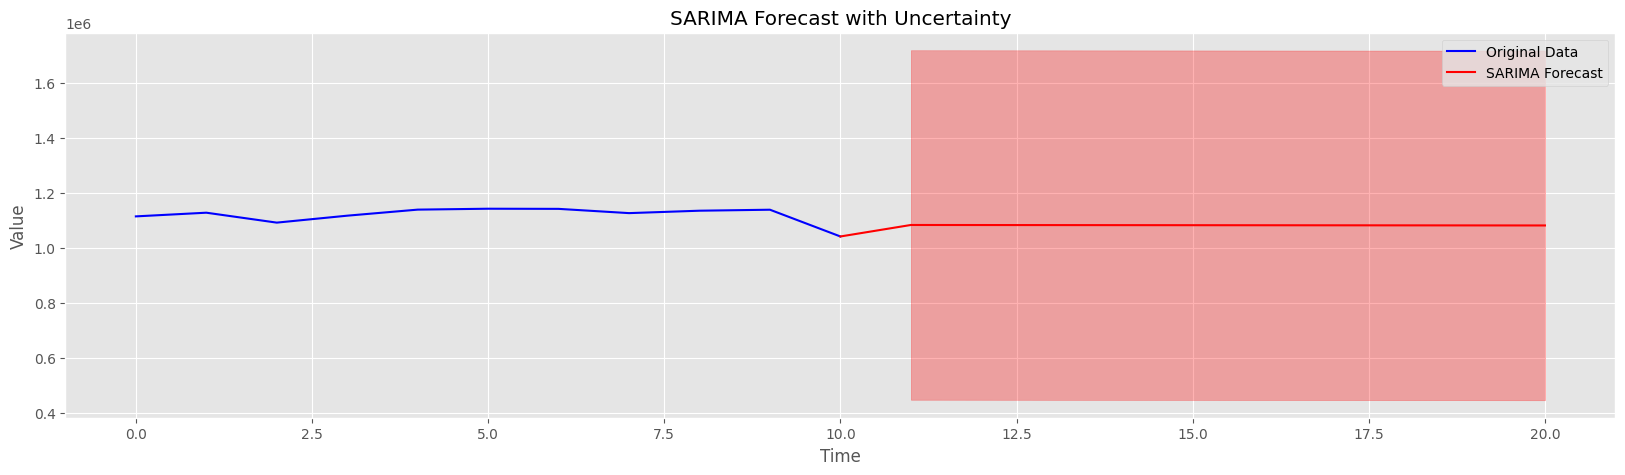

In [ ]:
# Concatenate the original data and the forecasted values
combined_data = np.concatenate([clean_df.transportation.values, arima_forecast])

# Create a time index for the combined data
time_index = np.arange(len(combined_data))

# Plot the combined data (original + forecasted)
plt.subplots(figsize=(20, 5))
plt.plot(time_index[:len(clean_df)], combined_data[:len(clean_df)], label='Original Data', color='blue')
plt.plot(time_index[len(clean_df)-1:], combined_data[len(clean_df)-1:], label='SARIMA Forecast', color='red')

# Plot the uncertainty for the forecasting part
plt.fill_between(time_index[len(clean_df):], lower_bound, upper_bound, alpha=0.3, color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast with Uncertainty')
plt.show()

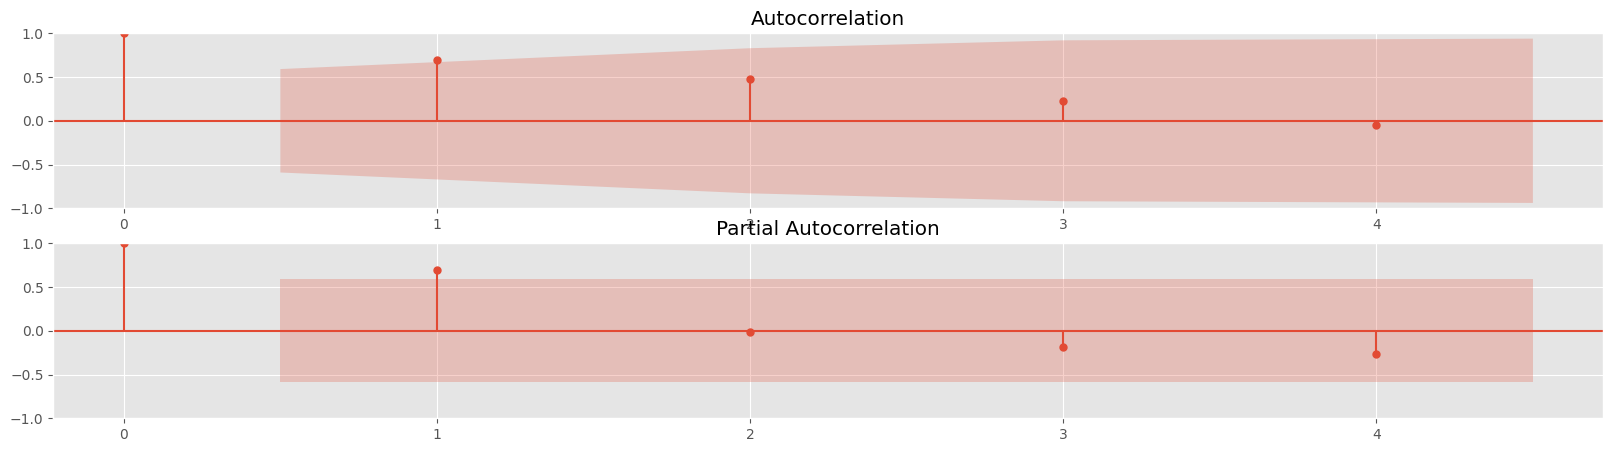

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5))
plot_acf(clean_df.water_waste, lags=4, ax=ax1) # AR (Auto Regressive)
plot_pacf(clean_df.water_waste, lags=4, ax=ax2) # MA (Moving Average)
plt.show()

In [ ]:
# Model
arima_model = SARIMAX(clean_df.water_waste, order=(2, 1, 1)) # (AR => Autocorrelation Graph, IN, MA => Partial Autocorrelation Graph)
arima_result = arima_model.fit()

# Forecasting
arima_forecast = arima_result.forecast(steps=10)
arima_forecast_water_waste = arima_result.forecast(steps=10)
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            water_waste   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -92.087
Date:                Mon, 09 Oct 2023   AIC                            192.175
Time:                        21:38:45   BIC                            193.385
Sample:                    01-01-2010   HQIC                           190.847
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9121      0.436      2.092      0.036       0.058       1.767
ar.L2          0.0876      0.438      0.200      0.841      -0.770       0.945
ma.L1         -0.9953      0.567     -1.754      0.079      -2.107       0.117
sigma2      8.057e+06   5.47e-08   1.47e+14      0.000    8.06e+06    8.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.60   Prob(JB):                         0.67
Heteroskedasticity (H):               2.06   Skew:                             0.69
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.37e+29. Standard errors may be unstable.
"""

In [ ]:
# Calculate a confidence interval for the predictions (e.g., 95% confidence interval)
confidence_interval = 1.96 * np.std(arima_result.resid)  # Assuming a 95% confidence interval

# Plot the upper and lower bounds of the confidence interval
upper_bound = arima_forecast + confidence_interval
lower_bound = arima_forecast - confidence_interval

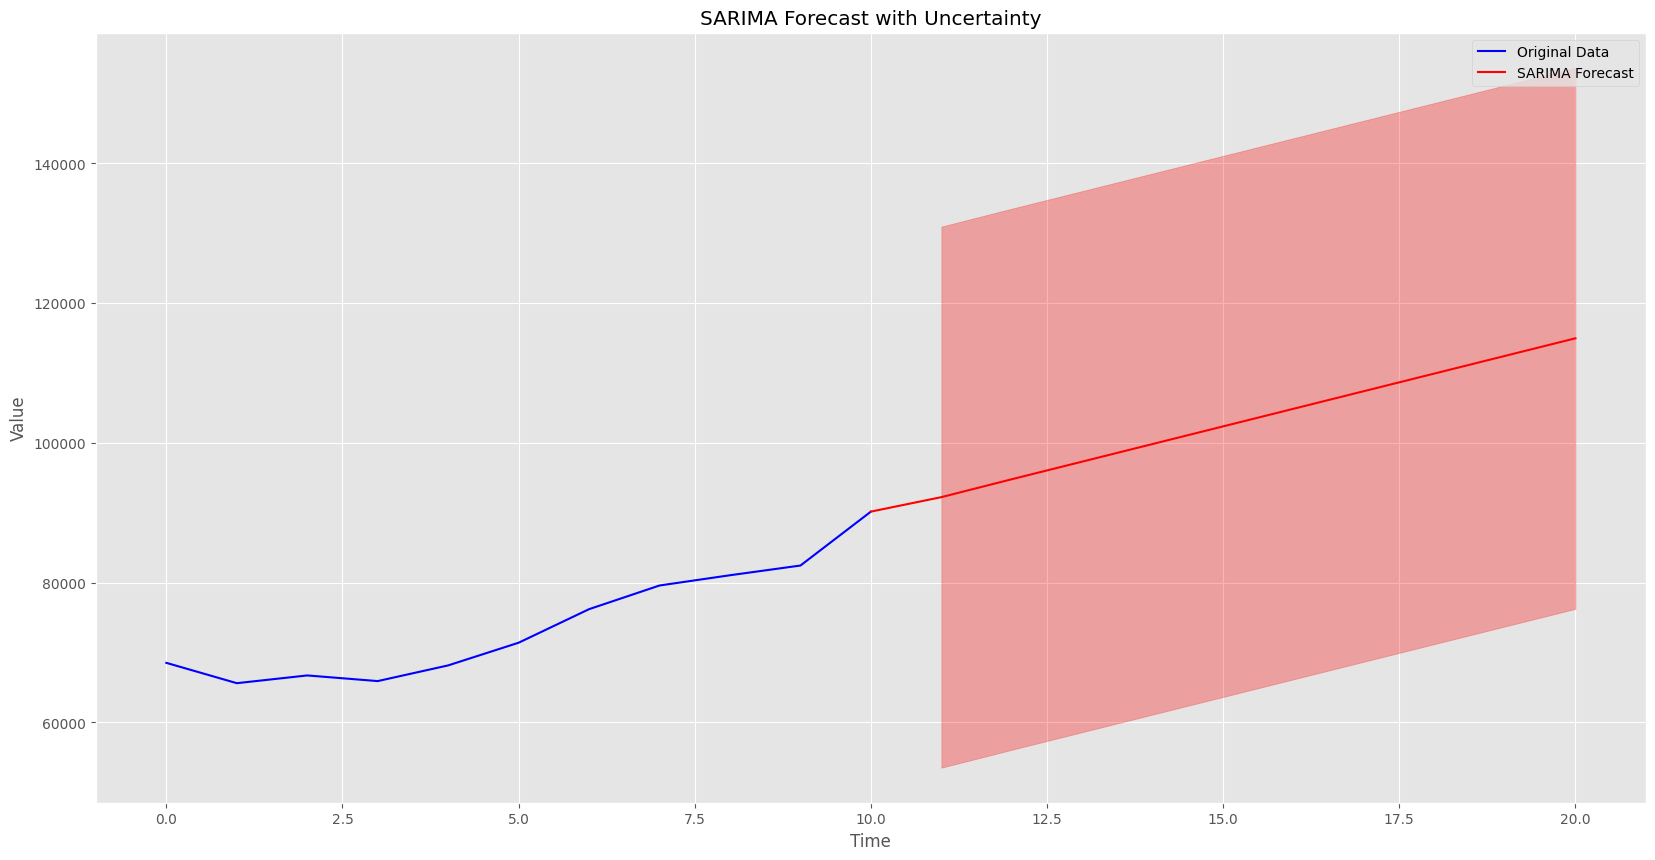

In [ ]:
# Concatenate the original data and the forecasted values
combined_data = np.concatenate([clean_df.water_waste.values, arima_forecast])

# Create a time index for the combined data
time_index = np.arange(len(combined_data))

# Plot the combined data (original + forecasted)
plt.subplots(figsize=(20, 10))
plt.plot(time_index[:len(clean_df)], combined_data[:len(clean_df)], label='Original Data', color='blue')
plt.plot(time_index[len(clean_df)-1:], combined_data[len(clean_df)-1:], label='SARIMA Forecast', color='red')

# Plot the uncertainty for the forecasting part
plt.fill_between(time_index[len(clean_df):], lower_bound, upper_bound, alpha=0.3, color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast with Uncertainty')
plt.show()

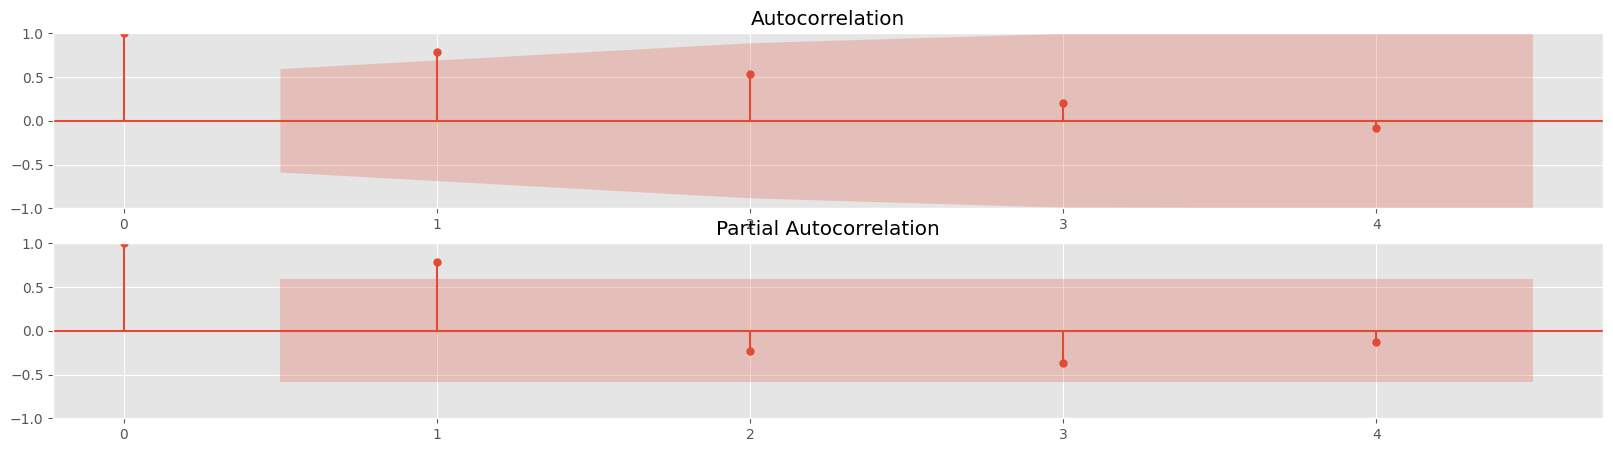

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5))
plot_acf(clean_df.agriculture, lags=4, ax=ax1) # AR (Auto Regressive)
plot_pacf(clean_df.agriculture, lags=4, ax=ax2) # MA (Moving Average)
plt.show()

In [ ]:
# Model
arima_model = SARIMAX(clean_df.agriculture, order=(2, 1, 1)) # (AR => Autocorrelation Graph, IN, MA => Partial Autocorrelation Graph)
arima_result = arima_model.fit()

# Forecasting
arima_forecast = arima_result.forecast(steps=10)
arima_forecast_agriculture = arima_result.forecast(steps=10)
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            agriculture   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -85.662
Date:                Mon, 09 Oct 2023   AIC                            179.323
Time:                        21:38:46   BIC                            180.534
Sample:                    01-01-2010   HQIC                           177.995
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9619      0.152     -6.342      0.000      -1.259      -0.665
ar.L2         -0.0012      0.135     -0.009      0.993      -0.265       0.263
ma.L1          1.0000      0.585      1.708      0.088      -0.147       2.147
sigma2      1.572e+06   3.72e-07   4.22e+12      0.000    1.57e+06    1.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.16   Prob(JB):                         0.75
Heteroskedasticity (H):               0.22   Skew:                             0.50
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.3e+28. Standard errors may be unstable.
"""

In [ ]:
# Calculate a confidence interval for the predictions (e.g., 95% confidence interval)
confidence_interval = 1.96 * np.std(arima_result.resid)  # Assuming a 95% confidence interval

# Plot the upper and lower bounds of the confidence interval
upper_bound = arima_forecast + confidence_interval
lower_bound = arima_forecast - confidence_interval

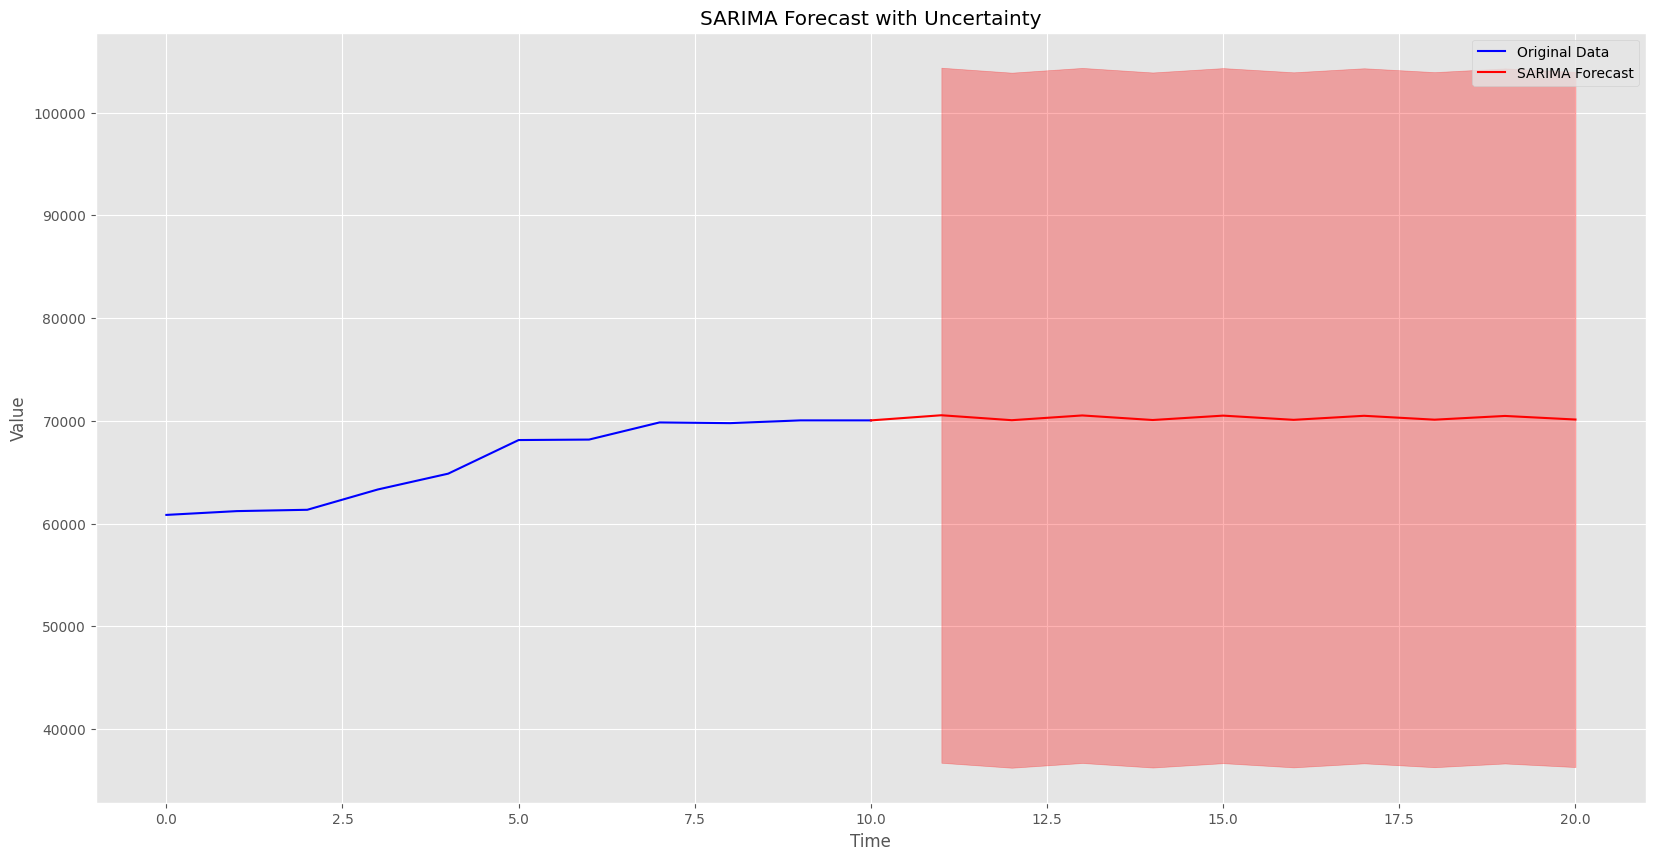

In [ ]:
# Concatenate the original data and the forecasted values
combined_data = np.concatenate([clean_df.agriculture.values, arima_forecast])

# Create a time index for the combined data
time_index = np.arange(len(combined_data))

# Plot the combined data (original + forecasted)
plt.subplots(figsize=(20, 10))
plt.plot(time_index[:len(clean_df)], combined_data[:len(clean_df)], label='Original Data', color='blue')
plt.plot(time_index[len(clean_df)-1:], combined_data[len(clean_df)-1:], label='SARIMA Forecast', color='red')

# Plot the uncertainty for the forecasting part
plt.fill_between(time_index[len(clean_df):], lower_bound, upper_bound, alpha=0.3, color='red')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast with Uncertainty')
plt.show()

In [ ]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            agriculture   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -85.662
Date:                Mon, 09 Oct 2023   AIC                            179.323
Time:                        21:38:47   BIC                            180.534
Sample:                    01-01-2010   HQIC                           177.995
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9619      0.152     -6.342      0.000      -1.259      -0.665
ar.L2         -0.0012      0.135     -0.009      0.993      -0.265       0.263
ma.L1          1.0000      0.585      1.708      0.088      -0.147       2.147
sigma2      1.572e+06   3.72e-07   4.22e+12      0.000    1.57e+06    1.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.16   Prob(JB):                         0.75
Heteroskedasticity (H):               0.22   Skew:                             0.50
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.3e+28. Standard errors may be unstable.
"""

The provided information appears to be the summary results of a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables) model. Let me explain each part of this summary:

Dep. Variable: This is the dependent variable in your SARIMAX model, which is "agriculture" in this case. It's the variable you are trying to model or forecast.

No. Observations: The number of observations or data points used in your model. In this case, there are 11 observations.

Model: This section provides information about the order of the SARIMA model used. In this case, the SARIMA model has the following order parameters: p=2, d=1, q=1. It means you have a second-order autoregressive term (AR(2)), a first-order differencing (I(1)) term, and a first-order moving average term (MA(1)).

Log Likelihood: The log-likelihood value measures how well your model fits the data. A higher log-likelihood indicates a better fit. In this case, the value is -85.662.

AIC (Akaike Information Criterion): AIC is a metric used for model selection. It penalizes models with more parameters to avoid overfitting. Lower AIC values indicate a better trade-off between model complexity and fit. In this case, the AIC value is 179.323.

BIC (Bayesian Information Criterion): Similar to AIC, BIC is another criterion for model selection that penalizes complex models. Like AIC, lower BIC values are preferred. Here, BIC is 180.534.

Sample: This indicates the date range of the data used in the model, from January 1, 2010, to January 1, 2020.

Covariance Type: The type of covariance used in estimating the parameters.

coef, std err, z, P>|z|, [0.025, 0.975]: These rows provide information about the coefficients of the model. Each coefficient corresponds to a parameter in the SARIMA model, including autoregressive (AR) and moving average (MA) terms. The columns typically include:

coef: The estimated coefficient value.
std err: The standard error of the coefficient estimate.
z: The z-score, which measures how many standard deviations the coefficient is away from zero.
P>|z|: The p-value associated with the z-score, used to test the null hypothesis that the coefficient is equal to zero.
[0.025, 0.975]: The 95% confidence interval for the coefficient.
sigma2: This is the estimated variance of the error term in your SARIMAX model.

Ljung-Box (L1) (Q): The Ljung-Box statistic is a test for the absence of serial correlation in the residuals. It tests whether the residuals are independent at different lags. In this case, it's reporting results for lag 1.

Jarque-Bera (JB): The Jarque-Bera statistic is a test for the normality of the residuals. A high p-value indicates that the residuals are normally distributed.

Heteroskedasticity (H): This section provides information about heteroskedasticity, which is a condition where the variability of the errors is not constant across observations. A p-value is provided to test for the presence of heteroskedasticity.

Skew and Kurtosis: These statistics measure the skewness (asymmetry) and kurtosis (tail thickness) of the residuals.

In summary, this output provides various statistics and information about the SARIMAX model, including its order, fit, coefficient estimates, and diagnostic tests for the residuals. It's useful for evaluating the model's performance and checking whether it meets the assumptions of the model.

In [ ]:
clean_df

,buildings_energy,transportation,water_waste,agriculture
2010-01-01,1718300,1115074,68531,60846
2011-01-01,1547270,1128432,65622,61215
2012-01-01,1517928,1092418,66729,61344
2013-01-01,1651284,1117615,65921,63318
2014-01-01,1597841,1139573,68167,64859
2015-01-01,1647461,1142883,71412,68130
2016-01-01,1732000,1142356,76214,68176
2017-01-01,1883920,1126903,79601,69844
2018-01-01,1814217,1135681,81070,69775
2019-01-01,2036584,1139261,82458,70043


In [ ]:
final_df = pd.DataFrame(
    {
        'buildings_energy': np.concatenate([clean_df.buildings_energy, arima_forecast_buildings_energy]),
        'transportation': np.concatenate([clean_df.transportation, arima_forecast_transportation]),
        'water_waste': np.concatenate([clean_df.water_waste, arima_forecast_water_waste]),
        'agriculture': np.concatenate([clean_df.agriculture, arima_forecast_agriculture])

    }, index=np.concatenate([clean_df.index, arima_forecast_agriculture.index])
)
final_df

,buildings_energy,transportation,water_waste,agriculture
2010-01-01,1.718300e+06,1.115074e+06,68531.000000,60846.000000
2011-01-01,1.547270e+06,1.128432e+06,65622.000000,61215.000000
2012-01-01,1.517928e+06,1.092418e+06,66729.000000,61344.000000
2013-01-01,1.651284e+06,1.117615e+06,65921.000000,63318.000000
2014-01-01,1.597841e+06,1.139573e+06,68167.000000,64859.000000
2015-01-01,1.647461e+06,1.142883e+06,71412.000000,68130.000000
2016-01-01,1.732000e+06,1.142356e+06,76214.000000,68176.000000
2017-01-01,1.883920e+06,1.126903e+06,79601.000000,69844.000000
2018-01-01,1.814217e+06,1.135681e+06,81070.000000,69775.000000
2019-01-01,2.036584e+06,1.139261e+06,82458.000000,70043.000000


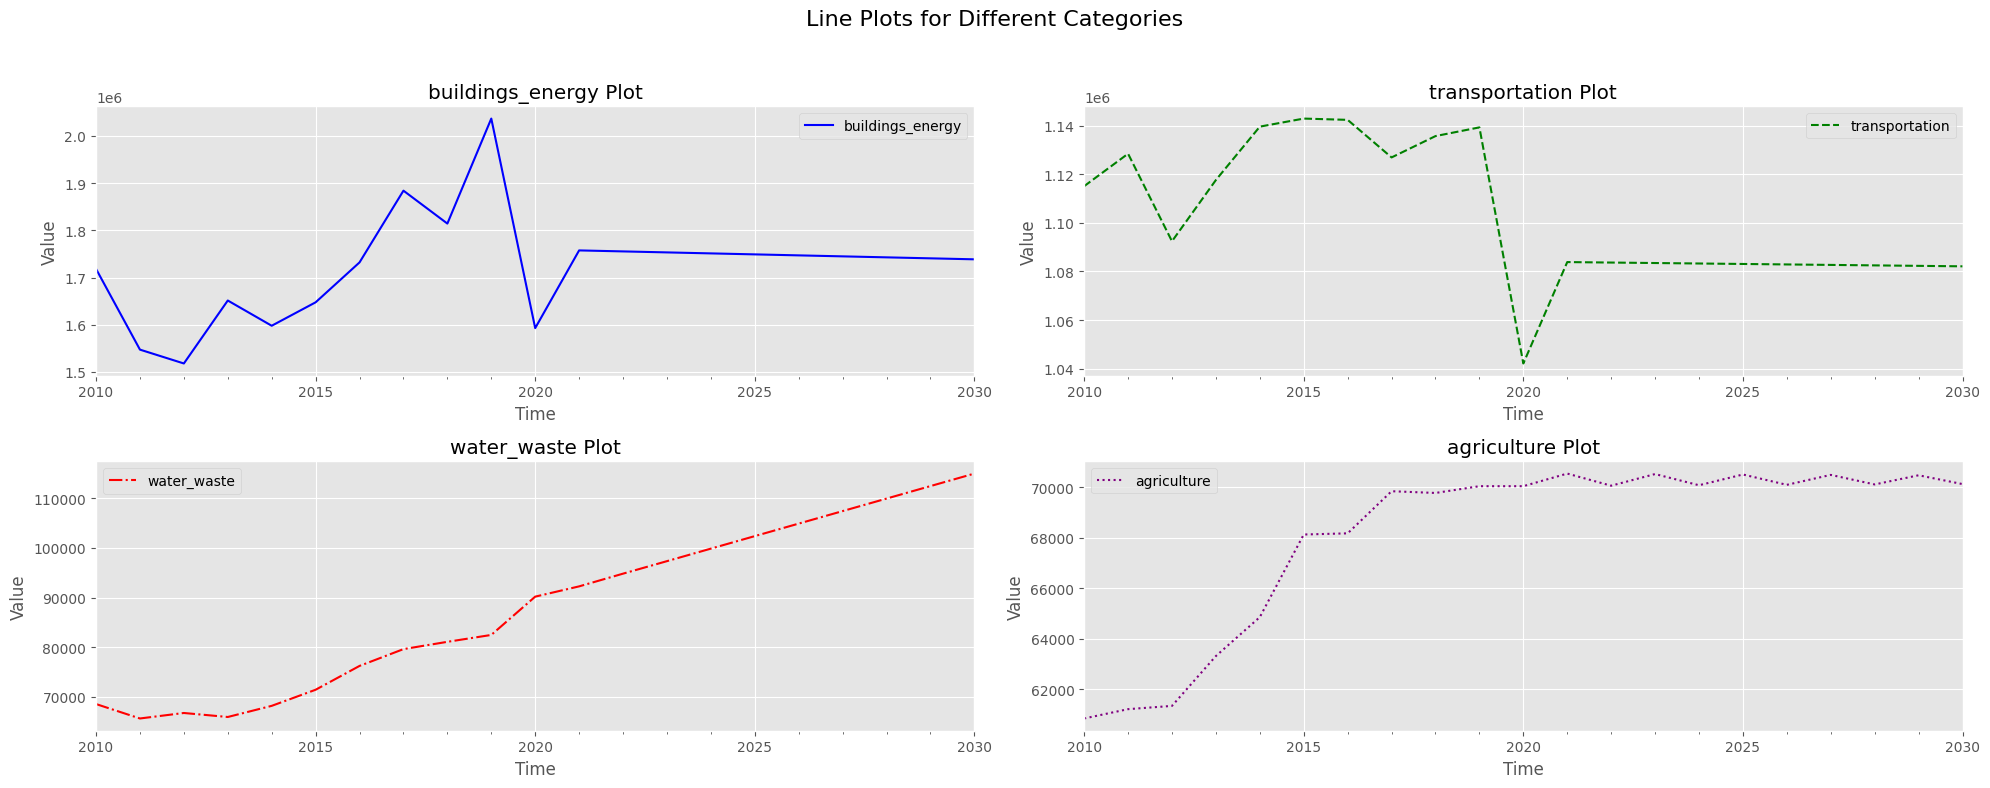

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
fig.suptitle('Line Plots for Different Categories', fontsize=16)

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['blue', 'green', 'red', 'purple']

# Plot each category in a separate subplot
for i, column in enumerate(final_df.columns):
    row = i // 2
    col = i % 2

    # Choose line style and color
    line_style = line_styles[i % len(line_styles)]
    color = colors[i % len(colors)]

    # Plot the data
    final_df[column].plot(ax=axes[row, col], label=column, linestyle=line_style, color=color)

    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title(f'{column} Plot')
    axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

In [ ]:
final_df.to_excel('/content/clean_data_and_forecasts_till_2030.xlsx')